![](https://i.pinimg.com/originals/af/bf/af/afbfafac1e700ed3ed9b4a4157a7fa98.jpg)


In [ ]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
train=pd.read_csv("../input/titanic/train.csv" )
tit1=train.select_dtypes(include=['float64','int64','object'])
train.info()

test=pd.read_csv("../input/titanic/test.csv")
tit2=test.select_dtypes(include=['float64','int64','object'])
test.info()

**We should know the size of the data we are working with.**

In [ ]:
print("train shape:",train.shape)
print("test shape :",test.shape)

In [ ]:
tit1.head()

In [ ]:
tit2.head()

In [ ]:
idtrain=train['PassengerId']
idtest=test['PassengerId']

**Adding a column for Survived which has to be predicted in the test data.**

In [ ]:
tit2['survived']=np.nan
tit2.head()

# **EXPLORING FEATURES**

**First we start by checking the counts of survived(1) and dead(0).
thus from the below graoh it is clear that there were more deaths than the ratio of survivors.
We also plot of graph for the division of genders, to see the ratio between men and women.
when the graph i splotted we see that the range of women seem more equivalent to the range of survivors and the range of deaths seem more closely related to the range of men.
So thus that mean that there were more women who survuived?
We shall se that further.**

In [ ]:
plt.figure(figsize=(4,4))
plt.title('SURVIVED',size=20)
tit1.Survived.value_counts().plot.bar(color=['red','green'])

plt.figure(figsize=(4,4))
plt.title('SEX',size=20)
tit1.Sex.value_counts().plot.bar(color=['skyblue','pink'])



**Lets find out the Survival Rate**

In [ ]:
total=train['Survived'].sum()
print("Total Survivors",total)
percent=round(np.mean(train['Survived']),3)*100
print("Percentage of Survivors:",percent)

**Lets find out the percentage of Women and Men**

In [ ]:

men=train[train['Sex']=='male']
women=train[train['Sex']=='female']
m=men['Sex'].count()
w=women['Sex'].count()
print("male:",m)
print("female:",w)
print("percentage of women:",round(w/(m+w)*100))
print("percentage of men:",round(m/(m+w)*100))

**Lets check for the number of Null Values in our DATA SET**

In [ ]:
train.isnull().sum()

**AGE and CABIN have the higest number of Null Values,so they will not be of major help since most of the values are missing,especially CABIN.
But lets see the Maximum age groups present.**

**Lets assign X value to all the NAN values**

In [ ]:
train['Cabin'] = train['Cabin'].fillna('X')
test['Cabin']=test['Cabin'].fillna('X')

In [ ]:
train['Age'].hist(bins=40,color='salmon')
plt.title("AGE",size=20)


**Lets examine the types of classes that were present**

In [ ]:
plt.figure(figsize=(5,5))
plt.title("CLASS DIVISION",size=20)
tit1.Pclass.value_counts().plot.bar(color=['olive','coral','gold'])

**Checking out the distribution of Fares**

In [ ]:
train['Fare'].hist(bins = 80, color = 'orange')
plt.title("FARE",size=20)

**Checking out Embarked Attribute.
  It has 3 discrete Divisions,namely S , C ,Q.**

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Embarked",size=20)
tit1.Embarked.value_counts().plot.bar(color=['olive','coral','gold'])

**Visualizing the data in our dataframe into a correlation heatmap **

In [ ]:
sns.heatmap(train.corr(), annot = True)

# **CLEANING DATA**

**Since we have explored all the features in our dataset,now we shall draw close comparisons with "SURVIVED" feature,to help us draw some inference.**

In [ ]:

plt.figure(figsize=(5,5))
sns.countplot(x = 'Survived', hue = 'Sex', data = train)
plt.title("SURVIVED AND SEX",size=20)

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)
plt.title("SURVIVED AND PCLASS",size=20)

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Survived', hue = 'Embarked', data = train)
plt.title("SURVIVED AND EMBARKED",size=20)

**Calculating median values of "Age" by using "Pclass" and "Embarked" to fill up the missing values.**

In [ ]:
age_group = train.groupby("Pclass")["Age"]
print(age_group.median())

In [ ]:
age_group = train.groupby("Embarked")["Age"]
print(age_group.median())

In [ ]:
train.loc[train.Age.isnull(),'Age']=train.groupby("Pclass").Age.transform('median')
test.loc[test.Age.isnull(),'Age']=test.groupby("Pclass").Age.transform('median')
print(train['Age'].isnull().sum())

**Now we have no missing values for AGE**

**Lets work out with the Cabin numbers**

In [ ]:
test['Cabin'].unique().tolist()

In [ ]:
cab = test.groupby("Cabin")["Age"]
print(cab.median())

In [ ]:

train['Cabin'].unique().tolist()

**We will be searching for the initials of the cabin numbers like A,B,C,etc**

In [ ]:

import re

test['Cabin'] = test['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
test['Cabin'].unique().tolist()


**Now we are assigning values to the initials that we had found in the above step and replace them with integers by mapping them.
Same step will be repeated for train and test data**

In [ ]:
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'X':8}
test['Cabin'] = test['Cabin'].map(category)
test['Cabin'].unique().tolist()

In [ ]:
cab = train.groupby("Cabin")["Age"]
print(cab.median())

In [ ]:


train['Cabin'] = train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train['Cabin'].unique().tolist()

In [ ]:
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'X':8, 'T':9}
train['Cabin'] = train['Cabin'].map(category)
train['Cabin'].unique().tolist()

**Lets check out the missing values again**

In [ ]:
print(train.isnull().sum())

**Now only "Embarked" has two missing values in it.**

In [ ]:
from statistics import mode
train["Embarked"] = train["Embarked"].fillna(mode(train["Embarked"]))

**So now we have filled the NAN values of embarked too.Lets check the null values again!**

In [ ]:
print(train.isnull().sum())

**GG!!So no more missing values in our dataset**

**Lets convert our categorical data to numeric form**

In [ ]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2


**Lets create a new column of fam using SibSp which means number of Siblings or Spouse and Parch which means number of Parents or Children,later we will be dropping SibSp and Parch from our data set since these values are alreday being used in Fam**

In [ ]:
train['fam']=train['SibSp']+train['Parch']+1
test['fam']=test['SibSp']+test['Parch']+1

In [ ]:
train['fam'].unique().tolist()


**Lets play a little with Age as well**

In [ ]:
train['Band'] = pd.cut(train['Age'], 5)
train[['Band', 'Survived']].groupby(['Band'], as_index=False).mean().sort_values(by='Band', ascending=True)

In [ ]:
range=[]
for i in train.Age:
    if i<= 16:
        range.append(0)
    elif i>16 and i<=32:
        range.append(1)
    elif i>32 and i<=48:
        range.append(2)
    elif i>48 and i<=64: 
        range.append(3)
    elif i>64 and i<=80:
        range.append(4)
    
    
train['range']=range    

In [ ]:
range=[]
for i in test.Age:
    if i<= 16:
        range.append(0)
    elif i>16 and i<=32:
        range.append(1)
    elif i>32 and i<=48:
        range.append(2)
    elif i>48 and i<=64: 
        range.append(3)
    elif i>64 and i<=80:
        range.append(4)
    else:
        range.append(5)
    
test['range']=range  

Lets check out if he is a lone wolf or is travelling in a pack!!

In [ ]:
solo=[]
for i in train.fam:
    
    if (i==1):  
        solo.append(1)
    else:
        solo.append(0)
train['solo'] =solo  

In [ ]:
solo=[]
for i in test.fam:
    
    if (i==1):  
        solo.append(1)
    else:
        solo.append(0)
test['solo'] =solo  

**Removing NAN values from fare and further converting them into different ranges**

In [ ]:
train['Fare'].fillna(train['Fare'].dropna().median(), inplace=True)
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)


In [ ]:
train['newfare']=pd.qcut(train['Fare'],4)
train[['newfare','Survived']].groupby(['newfare'],as_index=False).mean().sort_values(by='newfare', ascending=True)

In [ ]:
farerange=[]
for i in train.Fare:
    if i<= 8:
        farerange.append(0)
    elif i>8 and i<=14:
        farerange.append(1)
    elif i>14 and i<=31:
        farerange.append(2)
    elif i>31 and i<=513:
        farerange.append(3)
 
    
train['farerange']=farerange  

In [ ]:
farerange=[]
for i in test.Fare:
    if i<= 8:
        farerange.append(0)
    elif i>8 and i<=14:
        farerange.append(1)
    elif i>14 and i<=31:
        farerange.append(2)
    elif i>31 and i<=513:
        farerange.append(3)
    
test['farerange']=farerange  

**Lets play around with Name as well!**

**Searching for the titles and extracting them from the names in the given data**

In [ ]:
train['Title'] = train['Name'].map(lambda x: re.compile("([A-Za-z]+)\.").search(x).group())
test['Title'] = test['Name'].map(lambda x: re.compile("([A-Za-z]+)\.").search(x).group())
print(train['Title'].unique())
    

In [ ]:
print(test['Title'].unique())

**Mean survival rate according to the Titles assigned**

In [ ]:

    train['Title'] = train['Title'].replace(['Lady.', 'Capt.', 'Col.',
    'Don.', 'Dr.', 'Major.', 'Rev.', 'Jonkheer.', 'Dona.'], 'Rare.')
    
    train['Title'] = train['Title'].replace(['Countess.', 'Lady.', 'Sir.'], 'Royal.')
    train['Title'] = train['Title'].replace('Mlle.', 'Miss.')
    train['Title'] = train['Title'].replace('Ms.', 'Miss.')
    train['Title'] = train['Title'].replace('Mme.', 'Mrs.')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

**Replacing to make the categories narrower and accurate**

In [ ]:

    test['Title'] = test['Title'].replace(['Lady.', 'Capt.', 'Col.',
    'Don.', 'Dr.', 'Major.', 'Rev.', 'Jonkheer.', 'Dona.'], 'Rare.')
    
    test['Title'] = test['Title'].replace(['Countess.', 'Lady.', 'Sir.'], 'Royal.')
    test['Title'] = test['Title'].replace('Mlle.', 'Miss.')
    test['Title'] = test['Title'].replace('Ms.', 'Miss.')
    test['Title'] = test['Title'].replace('Mme.', 'Mrs.')



**Mapping new numerical values onto Titles**

In [ ]:
    title_mapping = {"Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4, "Royal.": 5, "Rare.": 6}

    train['Title'] = train['Title'].map(title_mapping)
    train['Title'] = train['Title'].fillna(0)

    train.head()

In [ ]:
    title_mapping = {"Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4, "Royal.": 5, "Rare.": 6}

    test['Title'] = test['Title'].map(title_mapping)
    test['Title'] = test['Title'].fillna(0)

   

**Lets check whether the conversion has worked or not**

In [ ]:
print(train['Age'])

In [ ]:
print(train['Cabin'])

In [ ]:
print(train['Sex'])

In [ ]:
print(train['Embarked'])

In [ ]:
print(train['fam'])

**The Data that we are dropping from the dataset**

In [ ]:
train.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
c=('Name', 'Sex', 'Ticket', 'Embarked')
for i in c:
    l=LabelEncoder()
    l.fit(list(train[i].values))
    train[i]=l.transform(list(train[i].values))
 

In [ ]:
c=('Name', 'Sex', 'Ticket', 'Embarked')
for i in c:
    l=LabelEncoder()
    l.fit(list(test[i].values))
    test[i]=l.transform(list(test[i].values))
 

In [ ]:

test = test.drop(['Parch','Age','Name','Cabin','PassengerId'], axis = 1)
test = test.drop(['Ticket','SibSp','fam','Fare'], axis = 1)


train = train.drop(['Parch',"Band",'Name','Cabin','newfare','PassengerId'], axis = 1)
train = train.drop(['Ticket','SibSp','Age','fam','Fare'], axis = 1)

**Lets start predicting,we will be using Logistic Regression.Logistic Regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.**

**train_test_split :Split arrays or matrices into random train and test subsets**

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis=1), 
                                                    train['Survived'], test_size = 0.2, 
                                                    random_state = 0)

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 30000)
logisticRegression.fit(X_train, y_train)




**Making and Printing our predictions**

In [ ]:
predictions = logisticRegression.predict(X_test)
acc_LOG = round(accuracy_score(predictions, y_test) * 100, 2)
print(acc_LOG)
print(predictions)




In [ ]:
round(np.mean(predictions), 3)

**This mean is pretty close to the one that we had calculated earlier(0.384)**

**Lets take help of confusion matrix to find out TP TN FP FN.A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.
**


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))

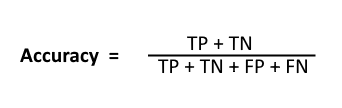


In [ ]:
accuracy=((84+50)/(84+50+26+19))
print('accuracy is: ', (round(accuracy, 2)*100))

# **RANDOM FOREST**

**Lets try using Random Forest.A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1)

random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

acc_rnd = round(accuracy_score(Y_pred, y_test) * 100, 2)
print(acc_rnd)


# **GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10)
gbk.fit(X_train, y_train)
pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(pred, y_test) * 100, 2)
print(acc_gbk)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_pred, y_test) * 100, 2)
acc_decision_tree

In [ ]:
model=pd.DataFrame({'Model':['Logistic Regression','Random Forest','Gradient Boosting','Decision Tree'],'Score':[acc_LOG,acc_rnd,acc_gbk,acc_decision_tree]})
model

In [ ]:
train.head(10)

In [ ]:
test.head()

**SUBMISSION FILE**

In [ ]:
ids = idtest
predictions =decision_tree.predict(test)


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)